# Examen Final - Bruno Merino 20191728

<h1>Pregunta 1<h1>

<h1>Indentifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.<h1>

* 	El primer elemento necesario es el de relevancia, es decir que la covarianza de la variable explicativa y la variable instrumental tiene que ser diferente de 0. En otras palabras, la variable explicativa y la variable instrumental tiene que tener una correlación alta o relevante. 
* 	Un segundo elemento necesario es el de exogeneidad, es decir que el instrumento escogido no se debe relacionar con el error, en caso no se cumpla esta condición el estimador puede salir sesgado.  

<h1>Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones<h1>

* Para encontrar el efecto causal en este caso sería necesario encontrar el estadístico F de la regresión usando la variable instrumental. Si el resultado es mayor que 10, sugiere que nuestro instrumento es suficientemente fuerte para la identificación. Por lo tanto, hay un efecto causal. 

<h1>¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación<h1>

* 	Es de esperar que el efecto de la educación sobre el nivel de ingresos será positivo, pues mientras más cantidad de años de educación de años tengas podrías alcanzar un mejor puesto laboral o exigir un mejor salario. En este sentido, la correlación podría ser diferente de 0; sin embargo, no habría una causalidad entre “Z” y “Y” o “Z” y “X”, ya que esta variable instrumental no tiene ningún efecto causal directo sobre ninguna de las variables. No obstante, sí entre educación y nivel de ingresos.

<h1>Pregunta 2<h1>

<h1>Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo.<h1>

* 	Running variable (forcing variable) (RV): Variable que determinará si es del grupo de control (estudiantes que tienen un promedio inferior durante la secundaria igual a 16) o del grupo de tratamiento (estudiantes que tienen un promedio superior durante la secundaria igual a 16). 

* 	Cut off: Es la variable dentro del RV (un elemento de observación de la variable RV) y que determinan a partir de qué observación perteneces al grupo de control o al grupo de tratamiento. 

* Bond Width: este elemento de un RDD determina qué tan lejos o cerca se está de la discontinuidad (cut off). 

<h1>Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.<h1>

* 	El efecto causal en este escenario se puede encontrar comparando el promedio de notas tanto del grupo de control como el de tratamiento. Y dado que el grupo de tratamiento tiene un mayor promedio de notas en el primer semestre de la universidad, se puede concluir que el efecto causal es positivo. 

<h1>¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .<h1>

* El efecto de la política aplicada sobre el rendimiento de los estudiantes, es de esperar que será positivo, pues la muestra recogida a la que se aplicó la beca son estudiantes con un promedio alto en la secundaria, entonces estos alumnos tienen un potencial alto para sacar buenas notas en el primer semestre de la universidad, independientemente de la beca. Por lo tanto, se puede concluir que solo haya una relación fuerte de correlación, mas no de causalidad. 

<h1>Pregunta 3<h1>

<h1>Indetifique todos los elementos necesarios para implementar un DiD en este ejemplo.<h1>

*	El grupo de tratamiento y el grupo de control
*	El punto de cambio donde se aplica una política 
*	El efecto en el grupo de tratamiento (grupo de control debería seguir igual)
*	Antes de la política ambos grupos deben mantener unas rectas paralelas
*	Posterior a la política la recta del grupo de control debe permanecer con la misma pendiente
*	Luego de la política el grupo de tratamiento debe presentar un cambio en la pendiente


<h1>Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.<h1>

* Para encontrar el efecto causal se tiene que hacer una doble resta. Es decir, restar el grupo de tratamiento después de la política menos el grupo de tratamiento antes de la política menos la resta entre grupo de control después de la política menos el grupo de control antes de la política. Para así poder encontrar la TE.

<h1>¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación<h1>

* En este caso se tendría que hacer un análisis sobre los inmigrantes, pues el resultado varía dependiendo del nivel de estudio, o de forma general, del potencial para ocupar un puesto de trabajo de estos. Pues si el potencial es alto respecto al promedio del país donde migran, se puede esperar una disminución de la tasa de empleo ya que aumenta la demanda de empleo y viceversa en caso el potencial se menor al promedio del país a donde migran. En este caso, se podría esperar que exista una relación causal y una correlación alta. Ya que partimos de una aleatoriedad.

<h1>Lecturas

* ¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación

Las debilidades del articulo podrían ser la omisión de variables como la clase social, la alimentación, la educación, el acceso a internet, entre otros; ya que, son factores que pueden influir en la innovación

* ¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación?

En primer lugar, se podría realizar comparación histórica de lugares en los que se haya dado la mita a través de documentación recopilada de artículos de la época de las colonias e inicios de la república y según los resultados analizar los factores que generan que los resultados sean similares o diferentes. 
En segundo lugar, se podrían analizar factores sociales que permitieron que los efectos de la mina perduraran más o menos según los lugares en los que se dio.



<h1>Código<h1>

In [1]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install causalgraphicalmodels
# pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns


In [6]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


<h1>histogramas para la variable años de educación <h1>

In [7]:
#Analizamos las variables educ y nearc2
data_educ = card[['educ','nearc2']]
data_educ

,educ,nearc2
0,7.0,0.0
1,12.0,0.0
2,12.0,0.0
3,11.0,1.0
4,12.0,1.0
...,...,...
3005,12.0,0.0
3006,13.0,0.0
3007,12.0,0.0
3008,12.0,0.0


In [11]:
## formacion de la variable  nearc2_char para la asignacion de existencia de colegios 
#"0.0=N_college"
#"1.0=college"

data_educ2 = (data_educ
 .assign(nearc2_char = np.select(
     [data_educ["nearc2"].astype(bool), data_educ["educ"].astype(bool)],
     ["college", "N_college"]
 ))) 
data_educ2

,educ,nearc2,nearc2_char
0,7.0,0.0,N_college
1,12.0,0.0,N_college
2,12.0,0.0,N_college
3,11.0,1.0,college
4,12.0,1.0,college
...,...,...,...
3005,12.0,0.0,N_college
3006,13.0,0.0,N_college
3007,12.0,0.0,N_college
3008,12.0,0.0,N_college


In [12]:
#agrupacion entre nearc2_char y educ
data_educ3 = data_educ2[['educ','nearc2_char']]
data_educ3

,educ,nearc2_char
0,7.0,N_college
1,12.0,N_college
2,12.0,N_college
3,11.0,college
4,12.0,college
...,...,...
3005,12.0,N_college
3006,13.0,N_college
3007,12.0,N_college
3008,12.0,N_college


<h1> Ploteo de Histogramas <h1>

* **Grafique dos histogramas para la variable años de educación educ para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.**

**cuando nearc2==0**

In [13]:
Groups = ["N_college"]
DIM = data_educ3[data_educ3['nearc2_char'].isin(Groups)]
DIM

,educ,nearc2_char
0,7.0,N_college
1,12.0,N_college
2,12.0,N_college
23,12.0,N_college
24,12.0,N_college
...,...,...
3005,12.0,N_college
3006,13.0,N_college
3007,12.0,N_college
3008,12.0,N_college


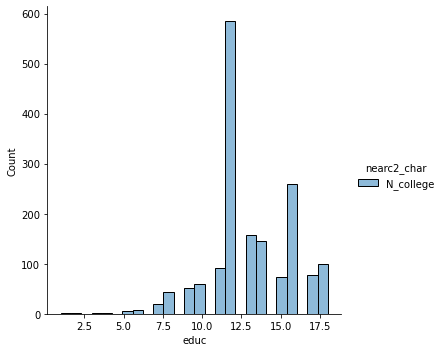

In [14]:
sns.displot(DIM, x="educ", hue= "nearc2_char")

**cuando nearc2==1**

In [15]:
Groups = ["college"]
DIM2 = data_educ3[data_educ3['nearc2_char'].isin(Groups)]
DIM2

,educ,nearc2_char
3,11.0,college
4,12.0,college
5,12.0,college
6,18.0,college
7,14.0,college
...,...,...
2899,10.0,college
2900,4.0,college
2901,8.0,college
2902,10.0,college


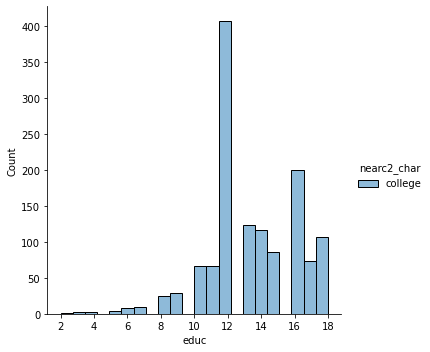

In [16]:
sns.displot(DIM2, x="educ", hue= "nearc2_char")

**Interpretacion**

* Siendo nearc2, se espera que nearc2 aumente los años de educación en más cantidad de personas. Efectivamente, como se ve en los histogramas, cuando la Dummy nearc2 = 1, la cantidad de personas con más años de educación casi de duplican. Por ejemplo, en las personas con 12 años de educación pasan de 350 a más de 600 personas aproximadamente. Esto se puede ver en la similitud que hay en la forma de los histogramas; sin embargo, en las personas con menos de 10 años de educación, la presencia de un colegio o no se hace menos determinante en comparación con los demás años de educación, pues la cantidad de años de educación es casi la misma con nerac2 =1 o =0.

<h1>histogramas para la variable logaritmos de los ingresos<h1>

In [17]:
#Analizamos las variables lwage y nearc2
data_lwage = card[['lwage','nearc2']]
data_lwage

,lwage,nearc2
0,6.306275,0.0
1,6.175867,0.0
2,6.580639,0.0
3,5.521461,1.0
4,6.591674,1.0
...,...,...
3005,5.814130,0.0
3006,6.175867,0.0
3007,6.214608,0.0
3008,6.569481,0.0


In [18]:
## formacion de la variable  nearc2_char para la asignacion de existencia de colegios 
#"0.0=N_college"
#"1.0=college"

data_lwage2 = (data_lwage
 .assign(nearc2_char = np.select(
     [data_lwage["nearc2"].astype(bool), data_lwage["lwage"].astype(bool)],
     ["college", "N_college"]
 ))) 
data_lwage2

,lwage,nearc2,nearc2_char
0,6.306275,0.0,N_college
1,6.175867,0.0,N_college
2,6.580639,0.0,N_college
3,5.521461,1.0,college
4,6.591674,1.0,college
...,...,...,...
3005,5.814130,0.0,N_college
3006,6.175867,0.0,N_college
3007,6.214608,0.0,N_college
3008,6.569481,0.0,N_college


In [19]:
#agrupacion entre nearc2_char y lwage
data_lwage3 = data_lwage2[['lwage','nearc2_char']]
data_lwage3

,lwage,nearc2_char
0,6.306275,N_college
1,6.175867,N_college
2,6.580639,N_college
3,5.521461,college
4,6.591674,college
...,...,...
3005,5.814130,N_college
3006,6.175867,N_college
3007,6.214608,N_college
3008,6.569481,N_college


<h1> Ploteo de Histogramas <h1>

* **Grafique dos histogramas para la variable logaritmos de los ingresos lwage para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.**

**cuando nearc2==0**

In [20]:
Groups = ["N_college"]
DIM3 = data_lwage3[data_lwage3['nearc2_char'].isin(Groups)]
DIM3

,lwage,nearc2_char
0,6.306275,N_college
1,6.175867,N_college
2,6.580639,N_college
23,6.403574,N_college
24,6.541030,N_college
...,...,...
3005,5.814130,N_college
3006,6.175867,N_college
3007,6.214608,N_college
3008,6.569481,N_college


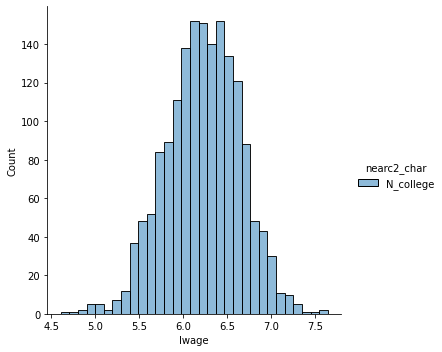

In [22]:
sns.displot(DIM3, x="lwage", hue= "nearc2_char")

**cuando nearc2==1**

In [23]:
Groups = ["college"]
DIM4 = data_lwage3[data_lwage3['nearc2_char'].isin(Groups)]
DIM4

,lwage,nearc2_char
3,5.521461,college
4,6.591674,college
5,6.214608,college
6,6.336826,college
7,6.410175,college
...,...,...
2899,5.669881,college
2900,5.521461,college
2901,6.725034,college
2902,6.075346,college


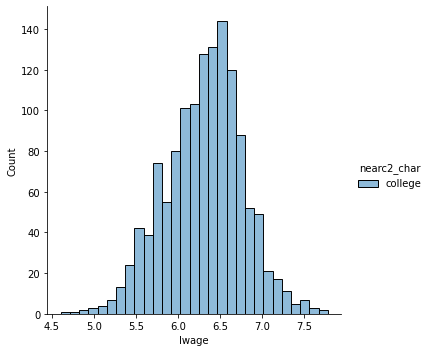

In [24]:
sns.displot(DIM4, x="lwage", hue= "nearc2_char")

**Interpretacion**

* Del mismo modo que para el caso de educación, es esperable que nearc2 haga que el logaritmo de los salarios aumente, pues se puede ver en los histogramas que cuando nearc2 = 1, el logaritmo del salario aumenta más del doble respecto a cuando nearc2 = 0. Sin embargo, cuando el logaritmo del salario es menor o igual a 5.5, la influencia de colegios no es tan fuerte, pues incluso llega a ser mayor el logaritmo del salario cuando nearc2 = 0, en algunos casos.

<h1> Regresiones <h1>

* **Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.**

In [27]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        15:29:48   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretacion**

* La regresión del salario versus las variables de: educación, experiencia, Dummy de afro-decendencia, Dummy de región sur, Dummy de casado y smsa. Muestran que el intercepto de la variable endógena "Logaritmo del Salario" es 5.06 unidades logarítmicas. Por otro lado, por cada unidad adicional de cada variable, la variable endógena aumenta menos de 0.2 unidades logarítmicas. Además, si quitamos el logaritmo de la variable endógena se puede observar otro intercepto y otra relación entre las demás variables versus el "Salario"

* **Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2. Compare los resultados encontrados usando IV2SLS con la primera regresión. ¿Cambió el coeficiente relacionado a educ , por qué?**

In [28]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)

In [29]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        15:33:00   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

**Interpretacion**

* Comparando ambas regresiones podemos ver que el intercepto ha disminuido considerablemente. Por ejemplo, la Dammy black se hace positiva, lo que quiere decir que si black=1 el intercepto sería mayor, es decir mayor salario.
* Respecto al coeficiente relacionando con la variable educ pasó de 0.1279 a 0.3618: esto quiere decir que, en la segunda regresión, por un año más de educación las unidades logarítmicas del salario aumentan más.
* Sin embargo el P-value no es significativo